In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path

In [ ]:
import warnings
warnings.filerwarnings("ignore")
'''import warnings
warnings.filterwarnings("ignore")'''

In [9]:
df = pd.read_csv('winemag (2).csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0.0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1.0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2.0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3.0,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4.0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [10]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [13]:
df.shape

(129868, 14)

In [14]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 129868 observations and 14 features in this dataset. 

There are 539 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 42 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [16]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [21]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87.0
2,US,"Tart and snappy, the flavors of lime flesh and...",87.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87.0
4,US,"Much like the regular bottling from 2012, this...",87.0


In [27]:
country = df.groupby('country')
country.describe().head()

Unnamed: 0                                       \
                            count          mean           std      min   
country                                                                  
Argentina                  1358.0  24185.520619  19721.768051     16.0   
Armenia                       1.0   8170.000000           NaN   8170.0   
Australia                   795.0  24541.620126  20328.407255     77.0   
Austria                    1146.0  23595.390925  16859.757903     93.0   
Bosnia and Herzegovina        1.0  16467.000000           NaN  16467.0   

                                                               points  \
                             25%      50%       75%       max   count   
country                                                                 
Argentina               10686.75  23050.0  33222.00  124479.0  1358.0   
Armenia                  8170.00   8170.0   8170.00    8170.0     1.0   
Australia               10868.00  23211.0  34543.00  124513.0   795.0   
Austria                 11577.00  22809.5  33283.25  124298.0  1146.0   
Bosnia and Herzegovina  16467.00  16467.0  16467.00   16467.0     1.0   

                                   ...                price             \
                             mean  ...   75%    max   count       mean   
country                            ...                                   
Argentina               86.594993  ...  89.0   95.0  1342.0  23.618480   
Armenia                 87.000000  ...  87.0   87.0     1.0  14.000000   
Australia               88.649057  ...  91.0  100.0   783.0  35.744572   
Austria                 90.115183  ...  92.0   97.0   965.0  31.008290   
Bosnia and Herzegovina  85.000000  ...  85.0   85.0     1.0  13.000000   

                                                                  
                              std   min   25%   50%   75%    max  
country                                                           
Argentina               22.031343   4.0  12.0  16.0  25.0  215.0  
Armenia                       NaN  14.0  14.0  14.0  14.0   14.0  
Australia               46.074871   7.0  16.0  21.0  40.0  780.0  
Austria                 18.086122   7.0  19.0  25.0  39.0  150.0  
Bosnia and Herzegovina        NaN  13.0  13.0  13.0  13.0   13.0  

[5 rows x 24 columns]

In [29]:
#country.mean().sort_values(by="points",ascending=False).head()
country.mean().sort_values(by='points', ascending=False).head()

,Unnamed: 0,points,price
country,,,
England,22777.384615,91.307692,56.750000
India,24400.000000,90.666667,14.000000
Austria,23595.390925,90.115183,31.008290
Germany,24018.526603,89.864939,42.135286
Switzerland,22800.333333,89.333333,116.666667


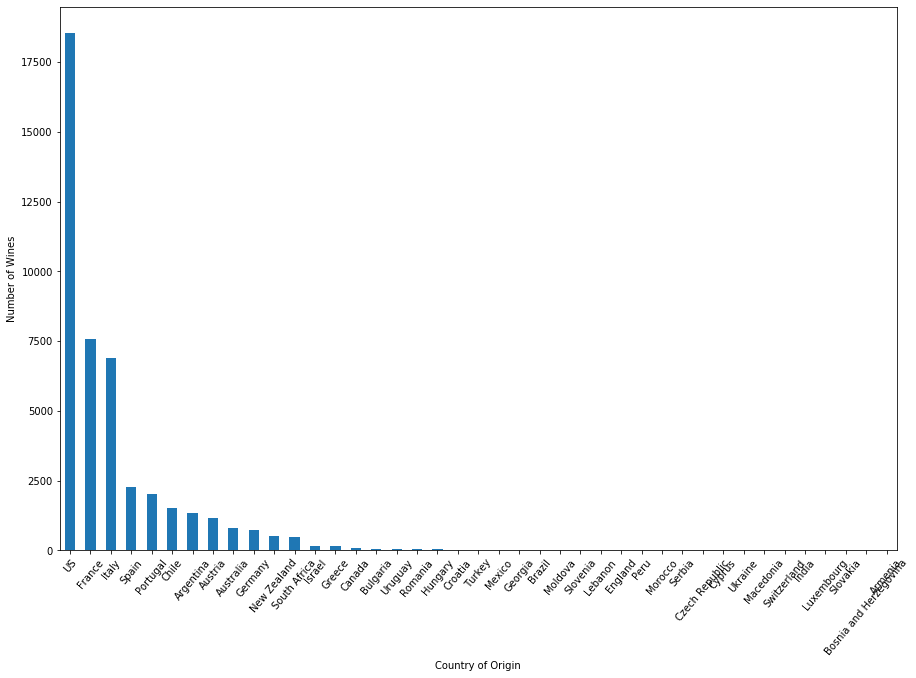

In [34]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

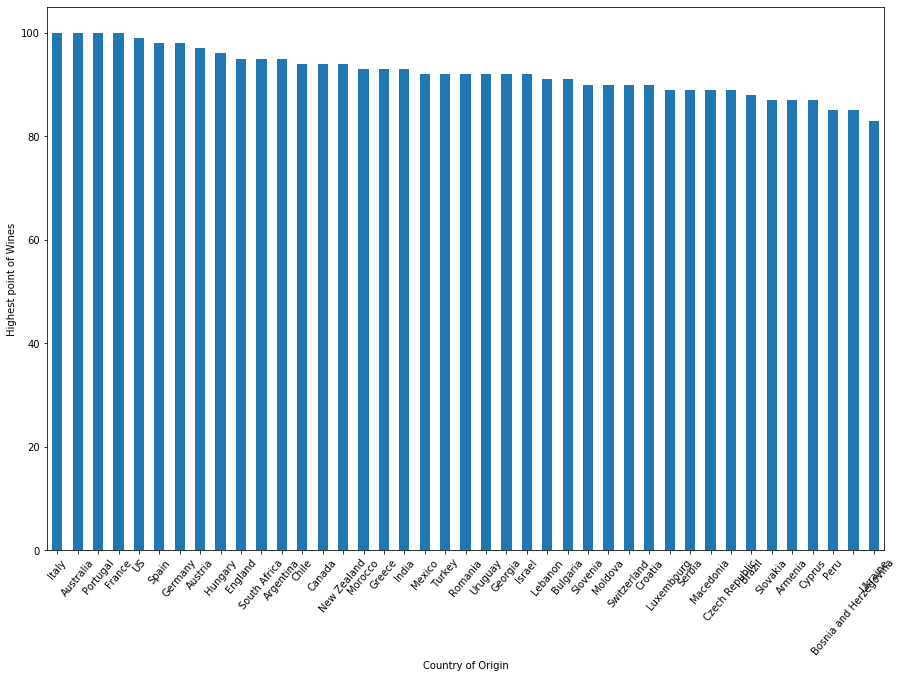

In [37]:
plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

In [40]:
?WordCloud

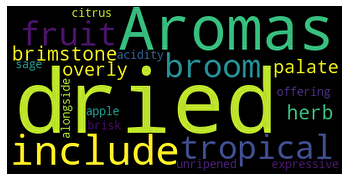

In [53]:
text = df.description[0]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='sinc')
plt.axis("Off")
plt.show()

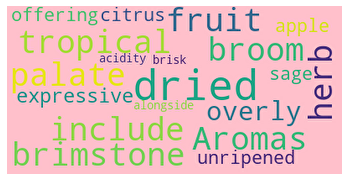

In [52]:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="pink").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="sinc")
plt.axis("off")
plt.show()


In [56]:
text = ",".join(str(review) for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

#values = ','.join(str(v) for v in value_list)

There are 11216707 words in the combination of all review.


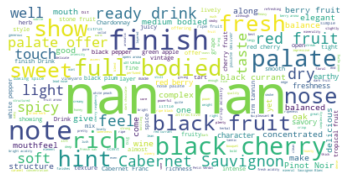

In [58]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [60]:
import numpy as np
wine_mask = np.array(Image.open("wine.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [61]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [62]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [63]:
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

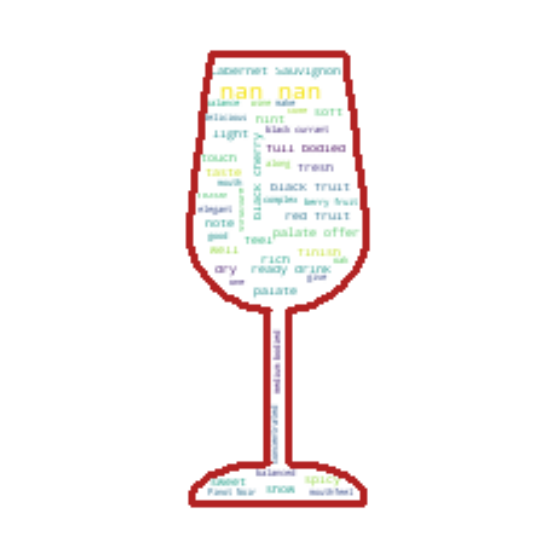

In [65]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()